In [3]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
lm = linear_model.LinearRegression()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#define file
file = pd.read_csv('marketing_customer_analysis.csv')

In [5]:
#bonus
# def calculate():
#     file = pd.read_csv('marketing_customer_analysis.csv')
#     display(file.head())
#     cols = []
#     for i in range(len(file.columns)):
#         cols.append(file.columns[i].lower())
#     file.columns = cols
#     display(cols)
#     display(file.dtypes)

#     file['month'] = pd.to_datetime(file['effective to date']).dt.month_name()
#     # file['month'] = file['Datetime'].dt.month_name()
#     display(file.head())

#     # USED OR OPERATOR SO NO NEED TO CHECK IF MARCH EXISTS
#     file = file[(file['month'] == 'January') | (file['month'] == 'February') | (file['month'] == 'March')]
#     display(file.head(10))

#     # CHECKING IF MARCH EXISTS
#     file = file[file['month'] == 'March']
#     display(file.head(10))


# calculate()

In [6]:
#changed date into a better format
file['Effective To Date'] = pd.to_datetime(file['Effective To Date'])
display(file.shape)
file.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#separate the features from the labels
y = file['Total Claim Amount']
X = file.drop(['Total Claim Amount'], axis=1)

In [8]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [9]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [10]:
from sklearn.preprocessing import StandardScaler        #not that good but included the code anyway
Standardtransformer = StandardScaler().fit(X_num)
x_standardized = Standardtransformer.transform(X_num)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=X_num.columns)
x_standardized.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


In [11]:
#categorical values
X_cat = file.select_dtypes(include = object)
#X_cat.head()

In [12]:
#Unique detection before drop
#for col in X_cat.columns:
#    print(col + ":" + str(X_cat[col].nunique()))

In [13]:
X_cat_new = X_cat.drop('Customer',axis=1)

In [14]:
#Unique detection after drop
#display(X_cat_new.shape)
#X_cat_new.head()

In [15]:
#for col in X_cat_new.columns:
#    print(col + ":" + str(X_cat_new[col].nunique()))

In [27]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
label_encoded = pd.DataFrame(data=None, columns=X_cat.columns)
for col in X_cat:
    label_encoded[col] = LabelEncoder().fit(X_cat[col]).transform(X_cat[col]) 
display(label_encoded.head())
#X_cat.apply(LabelEncoder().fit_transform)    #code from stack overflow
#display(label_encoded.head())


,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,600,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,5946,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,96,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,8016,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,2488,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [28]:
#onehot encoder
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame()
for col in X_cat_new.columns:
    encoder = OneHotEncoder().fit(X_cat_new[[col]])
    #print(encoder.categories_)
    encoded = encoder.transform(X_cat_new[[col]]).toarray()
    #print(encoded)
    onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
    #onehot_encoded.head()
    df=pd.concat([df,onehot_encoded], axis=1)
df.head()

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
X = pd.concat([x_normalized, label_encoded], axis=1)     #getting 0.61 r2 score using this
#X = pd.concat([x_normalized, onehot_encoded], axis=1)   #getting 0.52 r2 score using this

#X.dtypes

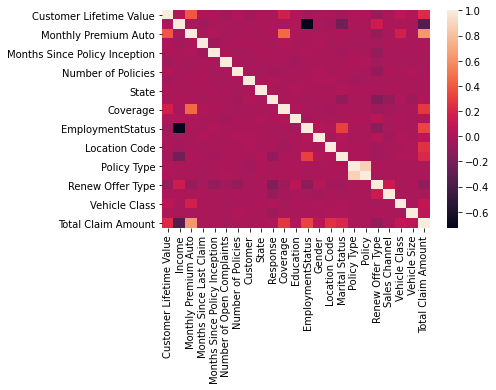

In [30]:
#heatmap from lab 4, with no new conclusions
correlations_matrix = pd.concat([X, y], axis = 1).corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=False)
plt.show()

In [31]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33) #tried test size 60,70,50,20,10

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5480, 22)
(3654, 22)
(5480,)
(3654,)


In [33]:
#train/fit model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [34]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6092817192252459

In [35]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)     

0.6069317405513887

In [36]:
#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
print('mae',mae)
mse = mean_squared_error(y_test,predictions)
print('mse',mse)
rmse = np.sqrt(mse)
print('rmse',rmse)
r2 = r2_score(y_test, predictions)
r2

mae 133.0948457422279
mse 35641.931666969795
rmse 188.79070863517038


0.6069317405513887

In [37]:
#Try to improve the linear regression model.
#***conclusion = the greater accuracy was around .40 test size*** 
